In [1]:
# Import relavant libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

In [2]:
filename='vial_number.csv'
vial=pd.read_csv(filename)
print(vial)
# init=vial.loc[(vial['Sample']=='Whole Sample') & (vial['Position']== 'Top'),['Vial', 'Tube']]
# print(init)

    Vial          Sample  Tube Position  Wieght
0     23  Initial Sample     6      Top  1922.2
1     13  Initial Sample     7      Top  1828.6
2     19  Initial Sample     8      Top  1412.3
3     18  Initial Sample     9      Top  1818.7
4      1  Initial Sample    10      Top  2384.4
5      8    Whole Sample     6      Top  1849.0
6     16    Whole Sample     7      Top  1092.4
7     28    Whole Sample     8      Top  1403.8
8     27    Whole Sample     9      Top  1635.5
9     20    Whole Sample    10      Top  1590.4
10    24  Initial Sample     6   Bottom  1130.8
11    14  Initial Sample     7   Bottom  1211.0
12    21  Initial Sample     8   Bottom  1129.3
13    15  Initial Sample     9   Bottom  1079.7
14    26  Initial Sample    10   Bottom  1242.4
15    25    Whole Sample     6   Bottom  1472.1
16    17    Whole Sample     7   Bottom  1509.4
17    29    Whole Sample     8   Bottom  1365.9
18    30    Whole Sample     9   Bottom  1544.7
19    22    Whole Sample    10   Bottom 

In [3]:
z=[]
filename = 'data_export_vial24.csv'
data = pd.read_csv(filename)
count=data.shape[0]
z.append(count)
print(z)

[5312]


In [4]:
###open each file and extract count
int_1=vial['Vial']
count=[]
for f in int_1:
    filename = 'data_export_vial{}.csv'.format(f)
    data = pd.read_csv(filename)
    c=data.shape[0]
    count.append(c)
    
vial['Count']=count

In [5]:
vial['Volume']=vial['Wieght']/1000    #The Wieght is in mg, using 1 g/mL to convert to volume TODO: account for salinity (22ppt) and lugols addition
vial['Conc']=vial['Count']/vial['Volume']  ###Need to correct for volume imaged
print(vial)

    Vial          Sample  Tube Position  Wieght  Count  Volume         Conc
0     23  Initial Sample     6      Top  1922.2   5150  1.9222  2679.221725
1     13  Initial Sample     7      Top  1828.6   5186  1.8286  2836.049437
2     19  Initial Sample     8      Top  1412.3   5126  1.4123  3629.540466
3     18  Initial Sample     9      Top  1818.7   5144  1.8187  2828.393908
4      1  Initial Sample    10      Top  2384.4   5149  2.3844  2159.453112
5      8    Whole Sample     6      Top  1849.0   5110  1.8490  2763.656030
6     16    Whole Sample     7      Top  1092.4   5184  1.0924  4745.514464
7     28    Whole Sample     8      Top  1403.8   5051  1.4038  3598.090896
8     27    Whole Sample     9      Top  1635.5   5092  1.6355  3113.420972
9     20    Whole Sample    10      Top  1590.4   5094  1.5904  3202.967807
10    24  Initial Sample     6   Bottom  1130.8   5312  1.1308  4697.559250
11    14  Initial Sample     7   Bottom  1211.0   5219  1.2110  4309.661437
12    21  In

In [6]:
WT=vial.loc[(vial['Sample']=='Whole Sample') & (vial['Position']== 'Top')]
WB=vial.loc[(vial['Sample']=='Whole Sample') & (vial['Position']== 'Bottom')]
IT=vial.loc[(vial['Sample']=='Initial Sample') & (vial['Position']== 'Top')]
IB=vial.loc[(vial['Sample']=='Initial Sample') & (vial['Position']== 'Bottom')]

print('Whole Top =',WT['Conc'].mean(),'(mean)',WT['Conc'].std(),'(std)')
print('Whole Bottom =',WB['Conc'].mean(),'(mean)', WB['Conc'].std(),'(std)')
print('Initial Top =',IT['Conc'].mean(),'(mean)',IT['Conc'].std(),'(std)')
print('Initial Bottom =',IB['Conc'].mean(),'(mean)', IB['Conc'].std(),'(std)')
print('Whole =',(1-WT['Conc'].mean()/WB['Conc'].mean())*100,'% removal')
print('Initial =',(1-IT['Conc'].mean()/IB['Conc'].mean())*100,'% removal')

Whole Top = 3484.7300338025916 (mean) 764.7934612980067 (std)
Whole Bottom = 3605.10902754039 (mean) 344.09193653247496 (std)
Initial Top = 2826.53172947423 (mean) 527.1648709525401 (std)
Initial Bottom = 4548.5879766091075 (mean) 330.0181282693305 (std)
Whole = 3.3391221407782945 % removal
Initial = 37.859139055690875 % removal


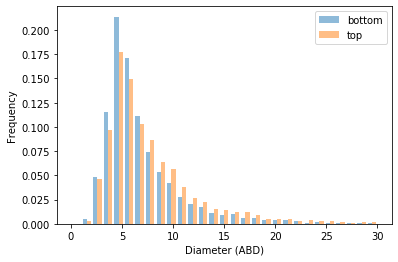

data_export_vial30.csv


In [7]:
### The histogram for the whole sample according to size
l=3 #position

# for f in l:
tt=WT['Vial'].iloc[l]
filename1 = 'data_export_vial{}.csv'.format(tt)
df_T = pd.read_csv(filename1)
bb=WB['Vial'].iloc[l]
filename2 = 'data_export_vial{}.csv'.format(bb)
df_B = pd.read_csv(filename2)
fig, ax = plt.subplots()
bins = np.linspace(0, 30, 30)
column ='Diameter (ABD)'

plt.hist([df_B[column],df_T[column]], bins, alpha=0.5, label=['bottom','top'],density=True)
ax.set_ylabel('Frequency')
ax.set_xlabel(column)
ax.legend(loc='upper right')
plt.show()
fig.savefig('Diameter-Hist.png')
print(filename2)

In [8]:
int_1=vial['Vial']
count=[]
for f in int_1:
    filename = 'Psuedofeces/vial_{}_data.csv'.format(f)
    data = pd.read_csv(filename)
    c=data.shape[0]
    count.append(c)

vial['PsuedoCount']=count
vial['PsuedoConc']=vial['PsuedoCount']/vial['Volume']  ###Need to correct for volume imaged

WT=vial.loc[(vial['Sample']=='Whole Sample') & (vial['Position']== 'Top')]
WB=vial.loc[(vial['Sample']=='Whole Sample') & (vial['Position']== 'Bottom')]
IT=vial.loc[(vial['Sample']=='Initial Sample') & (vial['Position']== 'Top')]
IB=vial.loc[(vial['Sample']=='Initial Sample') & (vial['Position']== 'Bottom')]

print('Whole Top =',WT['PsuedoConc'].mean(),'(mean)',WT['PsuedoConc'].std(),'(std)')
print('Whole Bottom =',WB['PsuedoConc'].mean(),'(mean)', WB['PsuedoConc'].std(),'(std)')
print('Initial Top =',IT['PsuedoConc'].mean(),'(mean)',IT['PsuedoConc'].std(),'(std)')
print('Initial Bottom =',IB['PsuedoConc'].mean(),'(mean)', IB['PsuedoConc'].std(),'(std)')
print('Whole =',(1-WT['PsuedoConc'].mean()/WB['PsuedoConc'].mean())*100,'% removal')
print('Initial =',(1-IT['PsuedoConc'].mean()/IB['PsuedoConc'].mean())*100,'% removal')

Whole Top = 1968.6921842479182 (mean) 480.0720707716297 (std)
Whole Bottom = 1684.9401389227412 (mean) 168.55598348655994 (std)
Initial Top = 1505.1566044109961 (mean) 280.93221818714505 (std)
Initial Bottom = 2067.9210320893626 (mean) 179.14805866296123 (std)
Whole = -16.840482268206426 % removal
Initial = 27.214019246652132 % removal


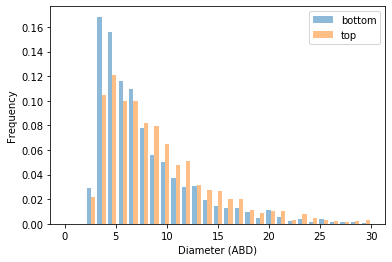

In [9]:
### The histogram for the Psuedofeces sample according to size
l=0 #position

# for f in l:
tt=WT['Vial'].iloc[l]
filename1 = 'Psuedofeces/vial_{}_data.csv'.format(tt)
df_T = pd.read_csv(filename1)
bb=WB['Vial'].iloc[l]
filename2 = 'Psuedofeces/vial_{}_data.csv'.format(bb)
df_B = pd.read_csv(filename2)
fig, ax = plt.subplots()
bins = np.linspace(0, 30, 30)
column ='Diameter (ABD)'

plt.hist([df_B[column],df_T[column]], bins, alpha=0.5, label=['bottom','top'],density=True)
ax.set_ylabel('Frequency')
ax.set_xlabel(column)
ax.legend(loc='upper right')
plt.show()
# fig.savefig('Diameter-Hist.png')


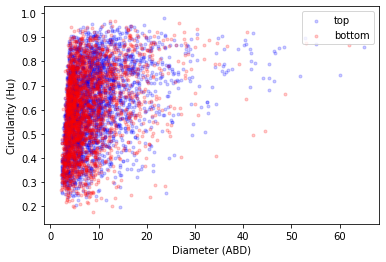

In [10]:
### The scatterplot for the Psuedofeces sample according to size vs circularity
l=3 #position

# for f in l:
tt=WT['Vial'].iloc[l]
filename1 = 'Psuedofeces/vial_{}_data.csv'.format(tt)
df_T = pd.read_csv(filename1)
bb=WB['Vial'].iloc[l]
filename2 = 'Psuedofeces/vial_{}_data.csv'.format(bb)
df_B = pd.read_csv(filename2)
fig, ax = plt.subplots()
column1 ='Diameter (ABD)'
column2 ='Circularity (Hu)'

plt.scatter(df_T[column1],df_T[column2], c='blue',marker='.',alpha=0.2, label='top')
plt.scatter(df_B[column1],df_B[column2], c='red', marker='.',alpha=0.2, label='bottom')

ax.set_ylabel(column2)
ax.set_xlabel(column1)
ax.legend(loc='upper right')
plt.show()
# fig.savefig('Diameter-Hist.png')


In [11]:
avg=[]
for f in int_1:
    filename = 'Psuedofeces/vial_{}_data.csv'.format(f)
    data = pd.read_csv(filename)
    ag=data['Diameter (ABD)'].mean()
    avg.append(ag)
    
vial['PsuedoSizeAvg']=avg

In [12]:
WT=vial.loc[(vial['Sample']=='Whole Sample') & (vial['Position']== 'Top')]
WB=vial.loc[(vial['Sample']=='Whole Sample') & (vial['Position']== 'Bottom')]
IT=vial.loc[(vial['Sample']=='Initial Sample') & (vial['Position']== 'Top')]
IB=vial.loc[(vial['Sample']=='Initial Sample') & (vial['Position']== 'Bottom')]

print('Whole Top =',WT['PsuedoSizeAvg'].mean(),'(mean)',WT['PsuedoSizeAvg'].std(),'(std)')
print('Whole Bottom =',WB['PsuedoSizeAvg'].mean(),'(mean)', WB['PsuedoSizeAvg'].std(),'(std)')
print('Initial Top =',IT['PsuedoSizeAvg'].mean(),'(mean)',IT['PsuedoSizeAvg'].std(),'(std)')
print('Initial Bottom =',IB['PsuedoSizeAvg'].mean(),'(mean)', IB['PsuedoSizeAvg'].std(),'(std)')


Whole Top = 9.839046427722726 (mean) 0.48626339603081953 (std)
Whole Bottom = 8.302403328416267 (mean) 0.2722449163765445 (std)
Initial Top = 8.319509026115838 (mean) 0.38784283953776105 (std)
Initial Bottom = 8.1213607257628 (mean) 0.10114837931326619 (std)
